# Phân Tích Khám Phá Dữ Liệu (EDA) - Bất Động Sản

## Mục tiêu:
1. **Thống kê mô tả** tất cả thuộc tính: trường dữ liệu, miền giá trị, min, max,...
2. **Phân tích sự phân bố** của giá nhà
3. **Nhận xét** và **trực quan hóa** dữ liệu

Notebook này sẽ thực hiện phân tích khám phá dữ liệu toàn diện cho dataset bất động sản.

In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

# Cấu hình hiển thị
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Cấu hình pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

print("Đã import thành công các thư viện!")

Đã import thành công các thư viện!


In [2]:
# Tải dữ liệu
df = pd.read_csv('dataset.csv')

print("=" * 60)
print("THÔNG TIN TỔNG QUAN VỀ DATASET")
print("=" * 60)
print(f"Kích thước dataset: {df.shape[0]} hàng x {df.shape[1]} cột")
print(f"Tổng số ô dữ liệu: {df.size}")
print(f"Bộ nhớ sử dụng: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")

print("\n" + "=" * 60)
print("5 DÒNG ĐẦU TIÊN CỦA DATASET")
print("=" * 60)
df.head()

THÔNG TIN TỔNG QUAN VỀ DATASET
Kích thước dataset: 200000 hàng x 47 cột
Tổng số ô dữ liệu: 9400000
Bộ nhớ sử dụng: 135.51 MB

5 DÒNG ĐẦU TIÊN CỦA DATASET


,id,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,area,city,zoning,subdivision,present_use,land_val,imp_val,year_built,year_reno,sqft_lot,sqft,sqft_1,sqft_fbsmt,grade,fbsmt_grade,condition,stories,beds,bath_full,bath_3qtr,bath_half,garb_sqft,gara_sqft,wfnt,golf,greenbelt,noise_traffic,view_rainier,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
0,0,11/15/2014,236000,2.0,,nochg,2025,47.2917,-122.3658,53,FEDERAL WAY,RS7.2,ALDERWOOD SOUTH DIV NO. 02,2,167000,372000,1975,0,10919,1560,1560,0,7,0,5,1.0,3,1,1,0,0,500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,I
1,1,1/15/1999,313300,NaN,26,nochg,2025,47.6531,-122.1996,74,KIRKLAND,RS 8.5,WILDWOOD LANE NO. 03,2,1184000,598000,1962,0,8900,2040,1220,820,7,7,4,1.0,3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Q
2,2,8/15/2006,341000,1.0,,nochg,2025,47.4733,-122.1901,30,RENTON,R-8,FALCON RIDGE (CEDAR RIDGE),2,230000,356000,1986,0,4953,1640,820,0,7,0,3,2.0,3,2,0,1,0,480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,K
3,3,12/15/1999,267000,1.0,,nochg,2025,47.4739,-122.3295,96,BURIEN,RS-7200,OLYMPIC VUE ESTATES,2,190000,518000,1998,0,6799,2610,1010,500,8,7,3,2.0,4,2,0,1,0,530,0,0,0,1,0,0,0,0,0,0,0,0,0,0,G
4,4,7/15/2018,1650000,2.0,,miss99,2025,47.7516,-122.1222,36,KING COUNTY,RA2.5,HOLLYWOOD HILL HIGHLANDS,2,616000,1917000,1998,0,31687,4040,3640,0,12,0,3,2.0,4,2,1,1,0,810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,P


## 1. THỐNG KÊ MÔ TẢ TẤT CẢ THUỘC TÍNH

Phần này sẽ phân tích chi tiết tất cả các thuộc tính trong dataset bao gồm:
- Kiểu dữ liệu của từng trường
- Miền giá trị (min, max, mean, median)
- Số lượng giá trị thiếu
- Số lượng giá trị duy nhất

In [3]:
# 1.1 Thông tin về kiểu dữ liệu và giá trị thiếu
print("=" * 80)
print("THÔNG TIN VỀ KIỂU DỮ LIỆU VÀ GIÁ TRỊ THIẾU")
print("=" * 80)

# Thông tin tổng quát
df.info()

print("\n" + "=" * 80)
print("TỔNG QUAN VỀ GIÁ TRỊ THIẾU")
print("=" * 80)

# Tạo bảng thống kê giá trị thiếu
missing_data = pd.DataFrame({
    'Số lượng thiếu': df.isnull().sum(),
    'Tỷ lệ thiếu (%)': (df.isnull().sum() / len(df)) * 100,
    'Kiểu dữ liệu': df.dtypes
})

missing_data = missing_data[missing_data['Số lượng thiếu'] > 0].sort_values('Số lượng thiếu', ascending=False)

if len(missing_data) > 0:
    print(missing_data)
else:
    print("Không có giá trị thiếu trong dataset!")

THÔNG TIN VỀ KIỂU DỮ LIỆU VÀ GIÁ TRỊ THIẾU
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 47 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                200000 non-null  int64  
 1   sale_date         200000 non-null  object 
 2   sale_price        200000 non-null  int64  
 3   sale_nbr          157818 non-null  float64
 4   sale_warning      200000 non-null  object 
 5   join_status       200000 non-null  object 
 6   join_year         200000 non-null  int64  
 7   latitude          200000 non-null  float64
 8   longitude         200000 non-null  float64
 9   area              200000 non-null  int64  
 10  city              200000 non-null  object 
 11  zoning            200000 non-null  object 
 12  subdivision       182450 non-null  object 
 13  present_use       200000 non-null  int64  
 14  land_val          200000 non-null  int64  
 15  imp_val           200000 

In [4]:
# 1.2 Thống kê mô tả chi tiết cho tất cả các cột số
print("=" * 80)
print("THỐNG KÊ MÔ TẢ CHO CÁC CỘT SỐ")
print("=" * 80)

# Lấy các cột số
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Số lượng cột số: {len(numeric_cols)}")
print(f"Các cột số: {numeric_cols}")

print("\n" + "-" * 80)
print("THỐNG KÊ TỔNG QUAN:")
print("-" * 80)

# Thống kê mô tả cơ bản
desc_stats = df[numeric_cols].describe()
print(desc_stats)

print("\n" + "-" * 80)
print("THỐNG KÊ BỔ SUNG:")
print("-" * 80)

# Thống kê bổ sung
additional_stats = pd.DataFrame({
    'Skewness': df[numeric_cols].skew(),
    'Kurtosis': df[numeric_cols].kurtosis(),
    'Variance': df[numeric_cols].var(),
    'Range': df[numeric_cols].max() - df[numeric_cols].min()
})

print(additional_stats)

THỐNG KÊ MÔ TẢ CHO CÁC CỘT SỐ
Số lượng cột số: 40
Các cột số: ['id', 'sale_price', 'sale_nbr', 'join_year', 'latitude', 'longitude', 'area', 'present_use', 'land_val', 'imp_val', 'year_built', 'year_reno', 'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'grade', 'fbsmt_grade', 'condition', 'stories', 'beds', 'bath_full', 'bath_3qtr', 'bath_half', 'garb_sqft', 'gara_sqft', 'wfnt', 'golf', 'greenbelt', 'noise_traffic', 'view_rainier', 'view_olympics', 'view_cascades', 'view_territorial', 'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm', 'view_otherwater', 'view_other']

--------------------------------------------------------------------------------
THỐNG KÊ TỔNG QUAN:
--------------------------------------------------------------------------------
                  id    sale_price       sale_nbr      join_year  \
count  200000.000000  2.000000e+05  157818.000000  200000.000000   
mean    99999.500000  5.841495e+05       2.162599    2023.403600   
std     57735.171256  4.17059

In [5]:
# 1.3 Thống kê mô tả cho các cột phân loại
print("=" * 80)
print("THỐNG KÊ MÔ TẢ CHO CÁC CỘT PHÂN LOẠI")
print("=" * 80)

# Lấy các cột phân loại
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Số lượng cột phân loại: {len(categorical_cols)}")
print(f"Các cột phân loại: {categorical_cols}")

if len(categorical_cols) > 0:
    print("\n" + "-" * 80)
    print("THÔNG TIN CHI TIẾT VỀ CÁC CỘT PHÂN LOẠI:")
    print("-" * 80)
    
    cat_summary = pd.DataFrame({
        'Số giá trị duy nhất': df[categorical_cols].nunique(),
        'Giá trị phổ biến nhất': df[categorical_cols].mode().iloc[0],
        'Tần suất giá trị phổ biến': [df[col].value_counts().iloc[0] for col in categorical_cols]
    })
    
    print(cat_summary)
    
    # Hiển thị top 5 giá trị cho mỗi cột phân loại
    print("\n" + "-" * 80)
    print("TOP 5 GIÁ TRỊ PHỔ BIẾN NHẤT CHO MỖI CỘT:")
    print("-" * 80)
    
    for col in categorical_cols:
        print(f"\n{col.upper()}:")
        print(df[col].value_counts().head())
        print("-" * 40)
else:
    print("Không có cột phân loại nào trong dataset!")

THỐNG KÊ MÔ TẢ CHO CÁC CỘT PHÂN LOẠI
Số lượng cột phân loại: 7
Các cột phân loại: ['sale_date', 'sale_warning', 'join_status', 'city', 'zoning', 'subdivision', 'submarket']

--------------------------------------------------------------------------------
THÔNG TIN CHI TIẾT VỀ CÁC CỘT PHÂN LOẠI:
--------------------------------------------------------------------------------
              Số giá trị duy nhất                   Giá trị phổ biến nhất  \
sale_date                     313                               6/15/2004   
sale_warning                  142                                           
join_status                     8                                   nochg   
city                           41                                 SEATTLE   
zoning                        500                                     NR3   
subdivision                 10376  MAPLE LEAF TO GREEN LAKE CIRCLE POR OF   
submarket                      19                                       K   

      

In [6]:
# 1.4 Bảng tổng hợp thông tin tất cả thuộc tính
print("=" * 100)
print("BẢNG TỔNG HỢP THÔNG TIN TẤT CẢ THUỘC TÍNH")
print("=" * 100)

# Tạo bảng tổng hợp
summary_table = pd.DataFrame({
    'Tên cột': df.columns,
    'Kiểu dữ liệu': df.dtypes.values,
    'Số giá trị không null': df.count().values,
    'Số giá trị null': df.isnull().sum().values,
    'Tỷ lệ null (%)': (df.isnull().sum() / len(df) * 100).values,
    'Số giá trị duy nhất': df.nunique().values
})

# Thêm thông tin min, max cho cột số
summary_table['Min'] = np.nan
summary_table['Max'] = np.nan
summary_table['Mean'] = np.nan
summary_table['Std'] = np.nan

for col in numeric_cols:
    idx = summary_table[summary_table['Tên cột'] == col].index[0]
    summary_table.loc[idx, 'Min'] = df[col].min()
    summary_table.loc[idx, 'Max'] = df[col].max()
    summary_table.loc[idx, 'Mean'] = df[col].mean()
    summary_table.loc[idx, 'Std'] = df[col].std()

# Thêm thông tin mẫu cho cột phân loại
summary_table['Giá trị mẫu'] = ''
for col in df.columns:
    idx = summary_table[summary_table['Tên cột'] == col].index[0]
    if col in categorical_cols:
        # Lấy top 3 giá trị phổ biến
        top_values = df[col].value_counts().head(3).index.tolist()
        summary_table.loc[idx, 'Giá trị mẫu'] = ', '.join(map(str, top_values))
    else:
        # Lấy một vài giá trị mẫu
        sample_values = df[col].dropna().head(3).tolist()
        summary_table.loc[idx, 'Giá trị mẫu'] = ', '.join(map(str, sample_values))

# Làm tròn số
summary_table = summary_table.round(2)

print(summary_table.to_string(index=False))

BẢNG TỔNG HỢP THÔNG TIN TẤT CẢ THUỘC TÍNH
         Tên cột Kiểu dữ liệu  Số giá trị không null  Số giá trị null  Tỷ lệ null (%)  Số giá trị duy nhất      Min         Max      Mean       Std                                                                            Giá trị mẫu
              id        int64                 200000                0            0.00               200000     0.00   199999.00  99999.50  57735.17                                                                                0, 1, 2
       sale_date       object                 200000                0            0.00                  313      NaN         NaN       NaN       NaN                                                        6/15/2004, 6/15/2006, 6/15/2005
      sale_price        int64                 200000                0            0.00                22687 50293.00  2999950.00 584149.49 417059.52                                                                 236000, 313300, 341000
        sale_nbr  

## 2. PHÂN TÍCH SỰ PHÂN BỐ CỦA GIÁ NHÀ

Phần này sẽ phân tích chi tiết sự phân bố của giá nhà (`sale_price`) bao gồm:
- Biểu đồ histogram và boxplot
- Các chỉ số thống kê (skewness, kurtosis)
- Phân tích outliers
- Phân bố theo các yếu tố khác nhau

In [7]:
# 2.1 Thống kê cơ bản về giá nhà
print("=" * 80)
print("THỐNG KÊ CƠ BẢN VỀ GIÁ NHÀ (SALE_PRICE)")
print("=" * 80)

price_stats = {
    'Số lượng': df['sale_price'].count(),
    'Giá trung bình': f"${df['sale_price'].mean():,.0f}",
    'Giá trung vị': f"${df['sale_price'].median():,.0f}",
    'Giá thấp nhất': f"${df['sale_price'].min():,.0f}",
    'Giá cao nhất': f"${df['sale_price'].max():,.0f}",
    'Độ lệch chuẩn': f"${df['sale_price'].std():,.0f}",
    'Phạm vi': f"${(df['sale_price'].max() - df['sale_price'].min()):,.0f}",
    'Skewness': f"{df['sale_price'].skew():.3f}",
    'Kurtosis': f"{df['sale_price'].kurtosis():.3f}"
}

for key, value in price_stats.items():
    print(f"{key:<20}: {value}")

print(f"\n{'Quartiles:':<20}")
quartiles = df['sale_price'].quantile([0.25, 0.5, 0.75])
for q, val in quartiles.items():
    print(f"  Q{int(q*4) if q != 0.5 else 2} ({q*100:.0f}%){'':>10}: ${val:,.0f}")

# Tính IQR và outliers
Q1 = df['sale_price'].quantile(0.25)
Q3 = df['sale_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['sale_price'] < lower_bound) | (df['sale_price'] > upper_bound)]
print(f"\n{'IQR:':<20}: ${IQR:,.0f}")
print(f"{'Lower bound:':<20}: ${lower_bound:,.0f}")
print(f"{'Upper bound:':<20}: ${upper_bound:,.0f}")
print(f"{'Số outliers:':<20}: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

THỐNG KÊ CƠ BẢN VỀ GIÁ NHÀ (SALE_PRICE)
Số lượng            : 200000
Giá trung bình      : $584,149
Giá trung vị        : $459,950
Giá thấp nhất       : $50,293
Giá cao nhất        : $2,999,950
Độ lệch chuẩn       : $417,060
Phạm vi             : $2,949,657
Skewness            : 2.092
Kurtosis            : 5.666

Quartiles:          
  Q1 (25%)          : $305,000
  Q2 (50%)          : $459,950
  Q3 (75%)          : $724,950

IQR:                : $419,950
Lower bound:        : $-324,925
Upper bound:        : $1,354,875
Số outliers:        : 11736 (5.87%)


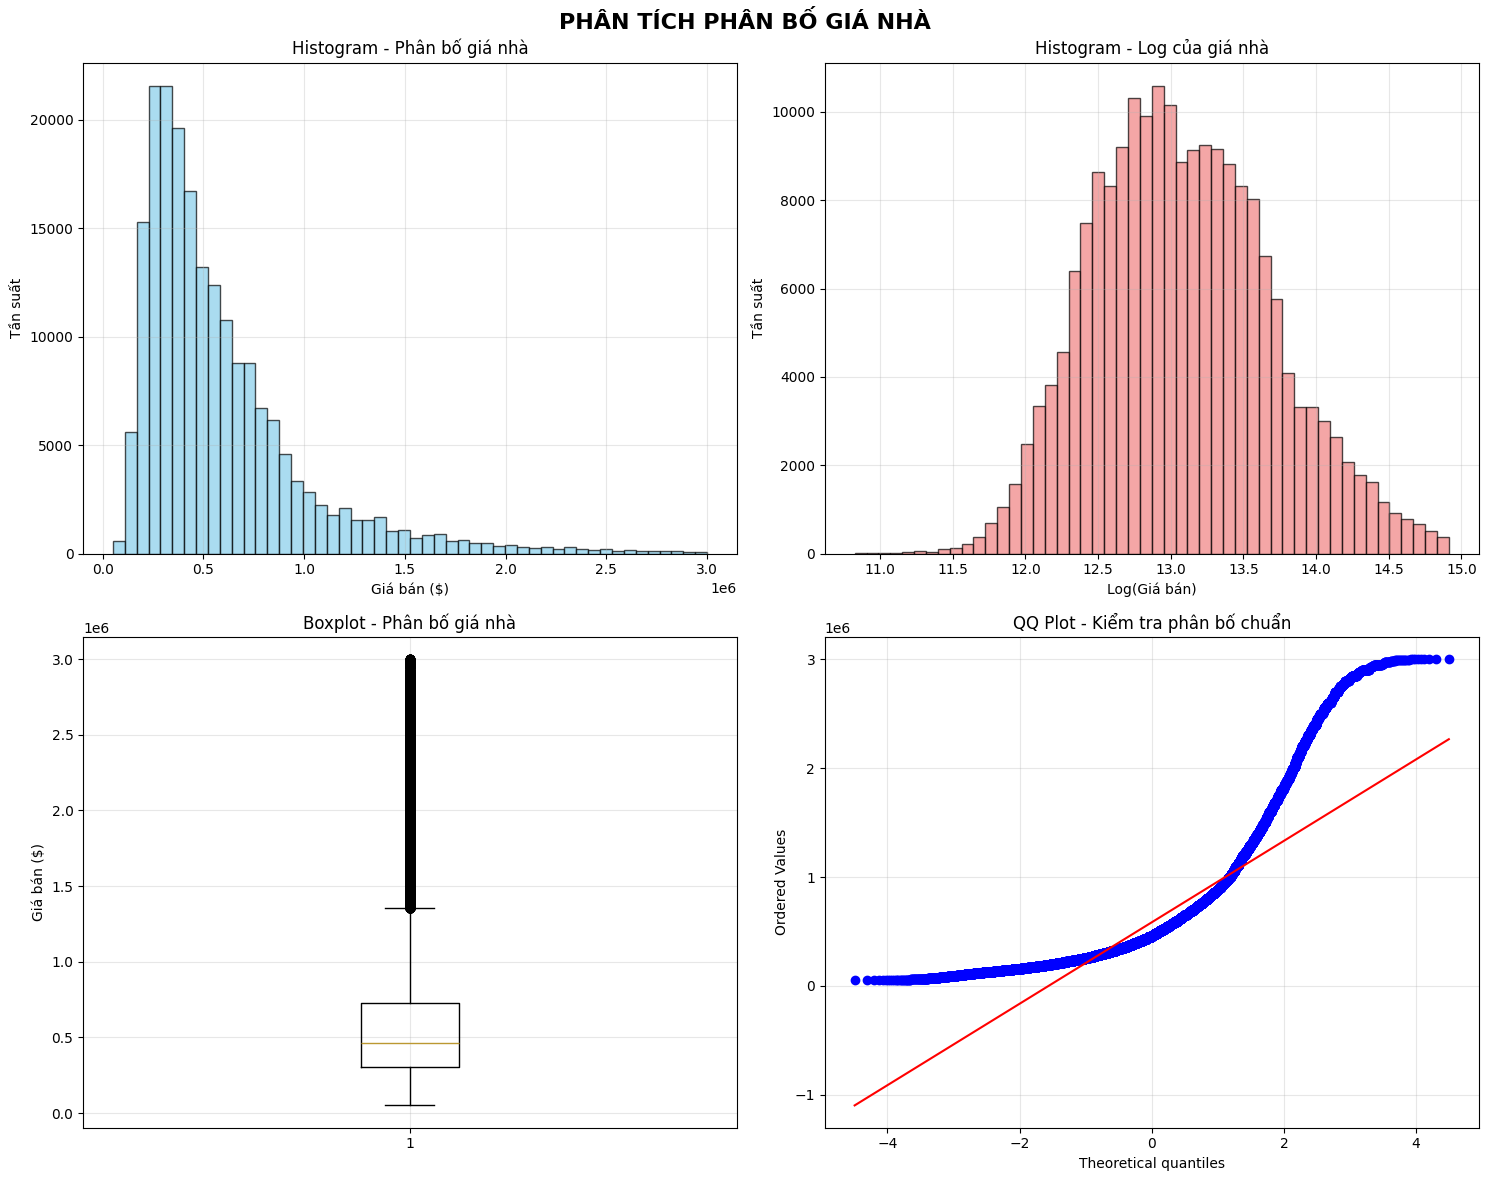

NHẬN XÉT VỀ PHÂN BỐ GIÁ NHÀ:
• Phân bố giá nhà lệch phải mạnh (Skewness = 2.092)
• Độ nhọn nhọn hơn phân bố chuẩn (Kurtosis = 5.666)
• Có 11736 outliers (5.87% tổng số)
• Khoảng giá phổ biến: $305,000 - $724,950


In [8]:
# 2.2 Biểu đồ phân bố giá nhà
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('PHÂN TÍCH PHÂN BỐ GIÁ NHÀ', fontsize=16, fontweight='bold')

# Histogram giá nhà
axes[0, 0].hist(df['sale_price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Histogram - Phân bố giá nhà')
axes[0, 0].set_xlabel('Giá bán ($)')
axes[0, 0].set_ylabel('Tần suất')
axes[0, 0].grid(True, alpha=0.3)

# Histogram log-scale
axes[0, 1].hist(np.log(df['sale_price']), bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Histogram - Log của giá nhà')
axes[0, 1].set_xlabel('Log(Giá bán)')
axes[0, 1].set_ylabel('Tần suất')
axes[0, 1].grid(True, alpha=0.3)

# Boxplot giá nhà
axes[1, 0].boxplot(df['sale_price'])
axes[1, 0].set_title('Boxplot - Phân bố giá nhà')
axes[1, 0].set_ylabel('Giá bán ($)')
axes[1, 0].grid(True, alpha=0.3)

# QQ plot để kiểm tra phân bố chuẩn
stats.probplot(df['sale_price'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('QQ Plot - Kiểm tra phân bố chuẩn')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Thêm thông tin về phân bố
print("=" * 60)
print("NHẬN XÉT VỀ PHÂN BỐ GIÁ NHÀ:")
print("=" * 60)

skewness = df['sale_price'].skew()
kurtosis = df['sale_price'].kurtosis()

if skewness > 1:
    skew_desc = "lệch phải mạnh"
elif skewness > 0.5:
    skew_desc = "lệch phải vừa"
elif skewness > -0.5:
    skew_desc = "gần như đối xứng"
elif skewness > -1:
    skew_desc = "lệch trái vừa"
else:
    skew_desc = "lệch trái mạnh"

if kurtosis > 3:
    kurt_desc = "nhọn hơn phân bố chuẩn"
elif kurtosis < -1:
    kurt_desc = "tù hơn phân bố chuẩn"
else:
    kurt_desc = "gần như phân bố chuẩn"

print(f"• Phân bố giá nhà {skew_desc} (Skewness = {skewness:.3f})")
print(f"• Độ nhọn {kurt_desc} (Kurtosis = {kurtosis:.3f})")
print(f"• Có {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}% tổng số)")
print(f"• Khoảng giá phổ biến: ${Q1:,.0f} - ${Q3:,.0f}")

In [9]:
# 2.3 Phân tích giá nhà theo các yếu tố khác nhau
print("=" * 80)
print("PHÂN TÍCH GIÁ NHÀ THEO CÁC YẾU TỐ KHÁC NHAU")
print("=" * 80)

# Tạo bins cho giá nhà
price_ranges = pd.cut(df['sale_price'], 
                     bins=[0, 300000, 500000, 750000, 1000000, 2000000, float('inf')],
                     labels=['<300K', '300K-500K', '500K-750K', '750K-1M', '1M-2M', '>2M'])

print("PHÂN BỐ THEO KHOẢNG GIÁ:")
print("-" * 40)
price_range_counts = price_ranges.value_counts().sort_index()
for range_name, count in price_range_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{range_name:<12}: {count:>8,} ({percentage:>5.1f}%)")

# Phân tích theo thành phố (nếu có)
if 'city' in df.columns:
    print(f"\n{'GIÁTRUNG BÌNH THEO THÀNH PHỐ (TOP 10):'}")
    print("-" * 50)
    city_prices = df.groupby('city')['sale_price'].agg(['mean', 'count']).sort_values('mean', ascending=False)
    city_prices = city_prices[city_prices['count'] >= 10]  # Chỉ lấy thành phố có ít nhất 10 căn
    
    for city, row in city_prices.head(10).iterrows():
        print(f"{city:<25}: ${row['mean']:>10,.0f} ({row['count']:>4} căn)")

# Phân tích theo diện tích (nếu có)
if 'sqft' in df.columns:
    print(f"\n{'TƯƠNG QUAN GIÁ VÀ DIỆN TÍCH:'}")
    print("-" * 40)
    correlation = df['sale_price'].corr(df['sqft'])
    print(f"Hệ số tương quan: {correlation:.3f}")
    
    # Tính giá trung bình theo m2
    df['price_per_sqft'] = df['sale_price'] / df['sqft']
    avg_price_per_sqft = df['price_per_sqft'].mean()
    print(f"Giá trung bình/sqft: ${avg_price_per_sqft:.0f}")

# Phân tích theo năm xây dựng (nếu có)
if 'year_built' in df.columns:
    print(f"\n{'GIÁ TRUNG BÌNH THEO THẬP NIÊN XÂY DỰNG:'}")
    print("-" * 50)
    df['decade'] = (df['year_built'] // 10) * 10
    decade_prices = df.groupby('decade')['sale_price'].agg(['mean', 'count']).sort_values('decade')
    decade_prices = decade_prices[decade_prices['count'] >= 10]
    
    for decade, row in decade_prices.iterrows():
        if not pd.isna(decade) and decade > 1900:
            print(f"{int(decade)}s{'':<15}: ${row['mean']:>10,.0f} ({row['count']:>4} căn)")

PHÂN TÍCH GIÁ NHÀ THEO CÁC YẾU TỐ KHÁC NHAU
PHÂN BỐ THEO KHOẢNG GIÁ:
----------------------------------------
<300K       :   48,859 ( 24.4%)
300K-500K   :   61,445 ( 30.7%)
500K-750K   :   44,016 ( 22.0%)
750K-1M     :   22,279 ( 11.1%)
1M-2M       :   20,306 ( 10.2%)
>2M         :    3,095 (  1.5%)

GIÁTRUNG BÌNH THEO THÀNH PHỐ (TOP 10):
--------------------------------------------------
YARROW POINT             : $ 1,539,155 (96.0 căn)
CLYDE HILL               : $ 1,419,134 (331.0 căn)
MEDINA                   : $ 1,414,821 (291.0 căn)
BEAUX ARTS               : $ 1,352,352 (43.0 căn)
MERCER ISLAND            : $ 1,214,589 (2200.0 căn)
HUNTS POINT              : $ 1,141,649 (29.0 căn)
BELLEVUE                 : $   837,354 (10691.0 căn)
NEWCASTLE                : $   812,485 (1438.0 căn)
SAMMAMISH                : $   769,860 (9563.0 căn)
ISSAQUAH                 : $   737,347 (3671.0 căn)

TƯƠNG QUAN GIÁ VÀ DIỆN TÍCH:
----------------------------------------
Hệ số tương quan: 0.466

## 3. TRỰC QUAN HÓA PHÂN BỐ CÁC THUỘC TÍNH

Phần này sẽ tạo các biểu đồ để trực quan hóa phân bố của:
- Các thuộc tính số: histogram, boxplot
- Các thuộc tính phân loại: bar chart, count plot
- Ma trận tương quan giữa các thuộc tính số

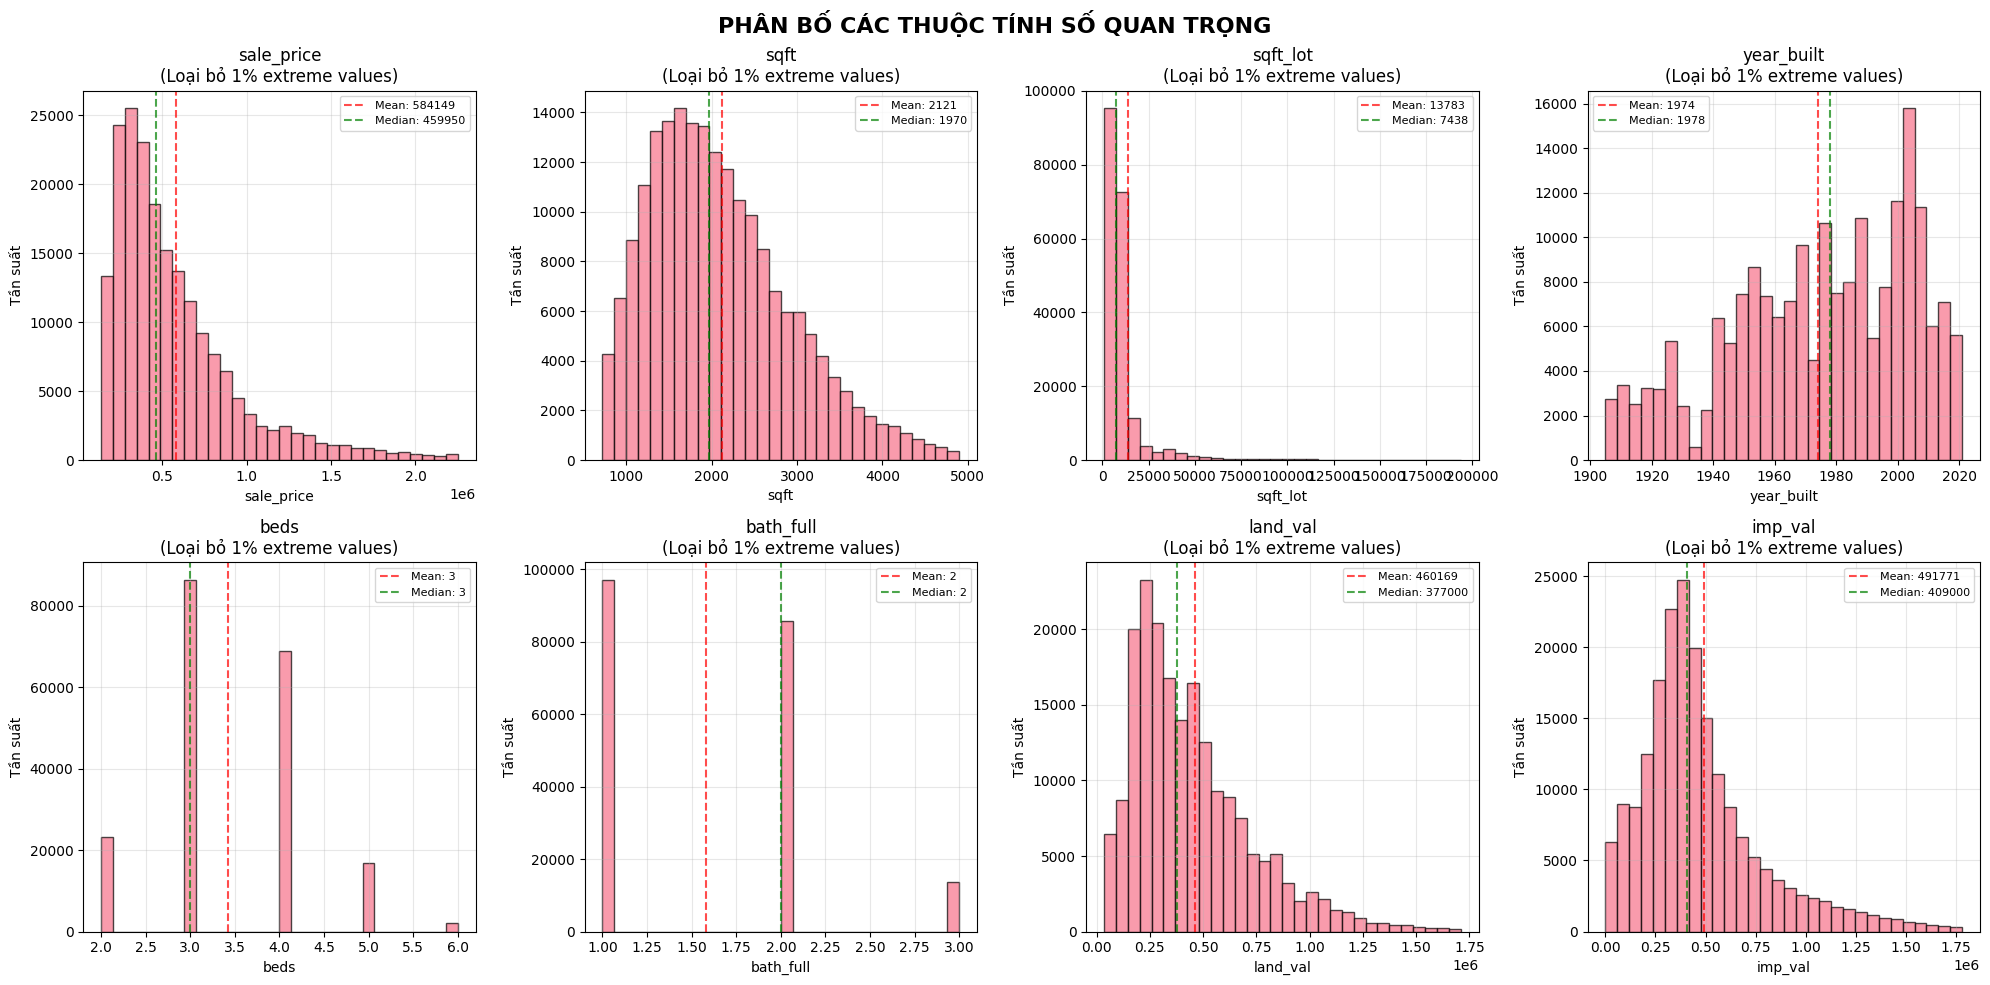

In [10]:
# 3.1 Histogram cho các thuộc tính số quan trọng
important_numeric = ['sale_price', 'sqft', 'sqft_lot', 'year_built', 'beds', 'bath_full', 'land_val', 'imp_val']
available_numeric = [col for col in important_numeric if col in df.columns]

if len(available_numeric) >= 4:
    n_cols = 4
    n_rows = (len(available_numeric) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    fig.suptitle('PHÂN BỐ CÁC THUỘC TÍNH SỐ QUAN TRỌNG', fontsize=16, fontweight='bold')
    
    # Flatten axes nếu có nhiều hàng
    if n_rows > 1:
        axes = axes.flatten()
    elif n_rows == 1:
        axes = axes if n_cols > 1 else [axes]
    
    for i, col in enumerate(available_numeric):
        if i < len(axes):
            # Loại bỏ outliers extreme để hiển thị tốt hơn
            Q1 = df[col].quantile(0.01)
            Q99 = df[col].quantile(0.99)
            filtered_data = df[col][(df[col] >= Q1) & (df[col] <= Q99)]
            
            axes[i].hist(filtered_data, bins=30, alpha=0.7, edgecolor='black')
            axes[i].set_title(f'{col}\n(Loại bỏ 1% extreme values)')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Tần suất')
            axes[i].grid(True, alpha=0.3)
            
            # Thêm thống kê
            mean_val = df[col].mean()
            median_val = df[col].median()
            axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.0f}')
            axes[i].axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Median: {median_val:.0f}')
            axes[i].legend(fontsize=8)
    
    # Ẩn các subplot không sử dụng
    for i in range(len(available_numeric), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("Không đủ thuộc tính số để hiển thị!")

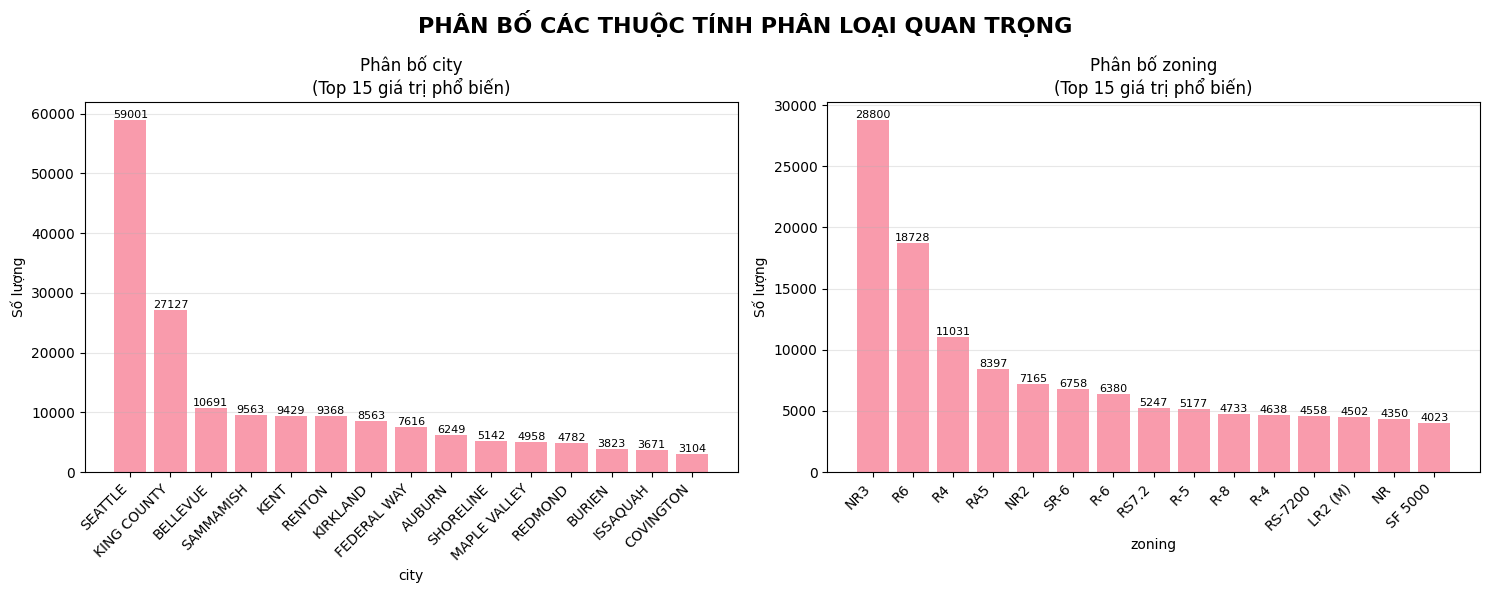

THỐNG KÊ CHI TIẾT CÁC THUỘC TÍNH PHÂN LOẠI:

CITY:
--------------------------------------------------
Tổng số giá trị duy nhất: 41
Top 5 giá trị phổ biến:
  1. SEATTLE: 59,001 (29.5%)
  2. KING COUNTY: 27,127 (13.6%)
  3. BELLEVUE: 10,691 (5.3%)
  4. SAMMAMISH: 9,563 (4.8%)
  5. KENT: 9,429 (4.7%)
  Khác: 84,189 (42.1%)

ZONING:
--------------------------------------------------
Tổng số giá trị duy nhất: 500
Top 5 giá trị phổ biến:
  1. NR3: 28,800 (14.4%)
  2. R6: 18,728 (9.4%)
  3. R4: 11,031 (5.5%)
  4. RA5: 8,397 (4.2%)
  5. NR2: 7,165 (3.6%)
  Khác: 125,879 (62.9%)


In [11]:
# 3.2 Biểu đồ cho các thuộc tính phân loại quan trọng
important_categorical = ['city', 'zoning', 'present_use', 'condition', 'grade']
available_categorical = [col for col in important_categorical if col in df.columns and col in categorical_cols]

if len(available_categorical) > 0:
    n_cols = 2
    n_rows = (len(available_categorical) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6*n_rows))
    fig.suptitle('PHÂN BỐ CÁC THUỘC TÍNH PHÂN LOẠI QUAN TRỌNG', fontsize=16, fontweight='bold')
    
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(available_categorical):
        if i < len(axes):
            # Lấy top 15 giá trị phổ biến nhất
            top_values = df[col].value_counts().head(15)
            
            # Tạo bar plot
            bars = axes[i].bar(range(len(top_values)), top_values.values, alpha=0.7)
            axes[i].set_title(f'Phân bố {col}\n(Top 15 giá trị phổ biến)')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Số lượng')
            axes[i].set_xticks(range(len(top_values)))
            axes[i].set_xticklabels(top_values.index, rotation=45, ha='right')
            axes[i].grid(True, alpha=0.3, axis='y')
            
            # Thêm nhãn giá trị lên các cột
            for j, bar in enumerate(bars):
                height = bar.get_height()
                axes[i].text(bar.get_x() + bar.get_width()/2., height,
                           f'{int(height)}',
                           ha='center', va='bottom', fontsize=8)
    
    # Ẩn subplot không sử dụng
    for i in range(len(available_categorical), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Thống kê chi tiết cho từng cột phân loại
    print("=" * 80)
    print("THỐNG KÊ CHI TIẾT CÁC THUỘC TÍNH PHÂN LOẠI:")
    print("=" * 80)
    
    for col in available_categorical:
        print(f"\n{col.upper()}:")
        print("-" * 50)
        value_counts = df[col].value_counts()
        total = len(df)
        
        print(f"Tổng số giá trị duy nhất: {len(value_counts)}")
        print(f"Top 5 giá trị phổ biến:")
        for idx, (value, count) in enumerate(value_counts.head().items()):
            percentage = (count / total) * 100
            print(f"  {idx+1}. {value}: {count:,} ({percentage:.1f}%)")
        
        if len(value_counts) > 5:
            others_count = value_counts.iloc[5:].sum()
            others_percentage = (others_count / total) * 100
            print(f"  Khác: {others_count:,} ({others_percentage:.1f}%)")
else:
    print("Không có thuộc tính phân loại quan trọng để hiển thị!")

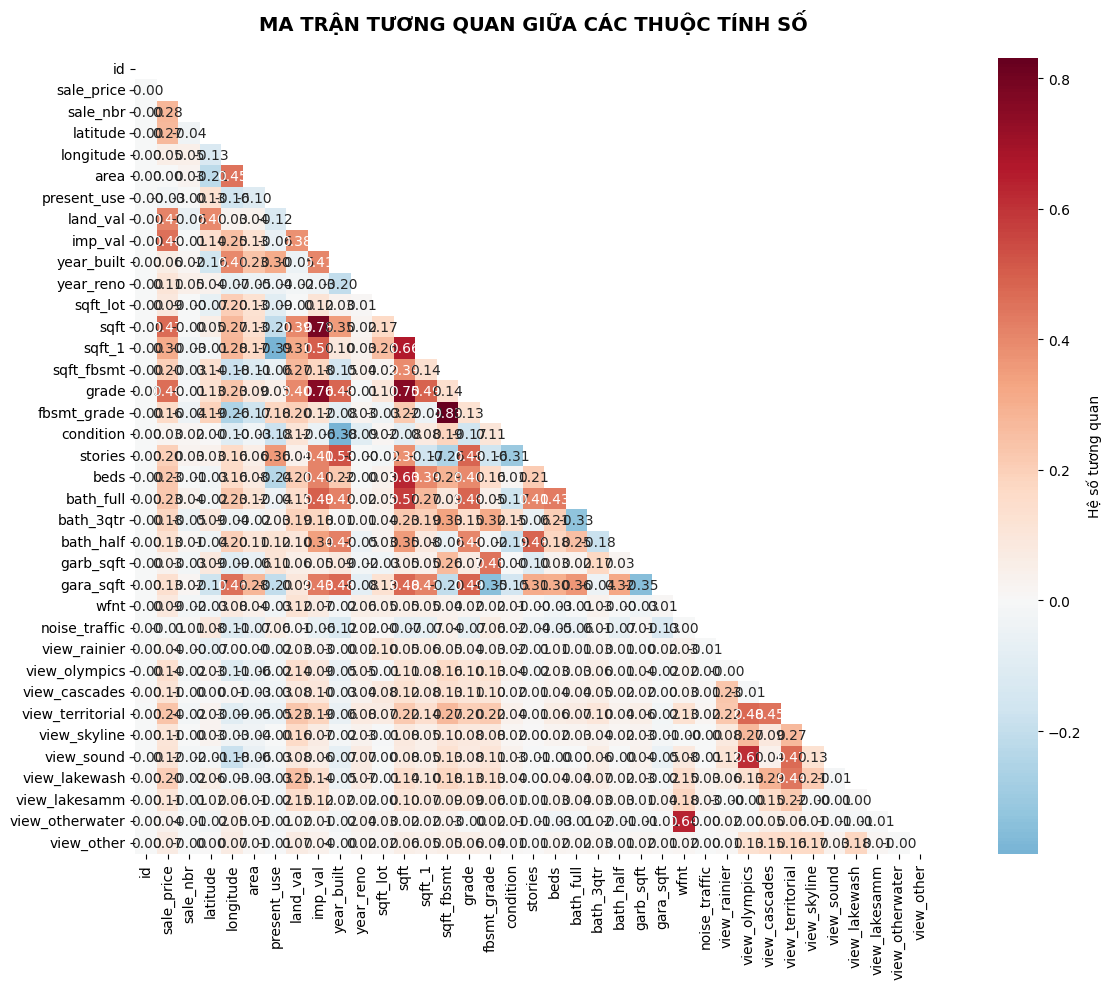

CÁC THUỘC TÍNH TƯƠNG QUAN MẠNH VỚI GIÁ NHÀ:
Tương quan mạnh (|r| > 0.3):
  • sqft: 0.466 (thuận)
  • grade: 0.464 (thuận)
  • imp_val: 0.455 (thuận)
  • land_val: 0.412 (thuận)
  • sqft_1: 0.304 (thuận)

Tương quan vừa (0.1 < |r| ≤ 0.3):
  • sale_nbr: 0.278 (thuận)
  • latitude: 0.273 (thuận)
  • view_territorial: 0.236 (thuận)
  • bath_full: 0.226 (thuận)
  • beds: 0.225 (thuận)

Tương quan yếu (|r| ≤ 0.1): 13 thuộc tính

CÁC CẶP THUỘC TÍNH TƯƠNG QUAN MẠNH VỚI NHAU:
Các cặp có tương quan rất mạnh (|r| > 0.7):
  • sqft_fbsmt ↔ fbsmt_grade: 0.831 (thuận)
  • imp_val ↔ sqft: 0.784 (thuận)
  • imp_val ↔ grade: 0.757 (thuận)
  • sqft ↔ grade: 0.751 (thuận)


In [12]:
# 3.3 Ma trận tương quan cho các thuộc tính số
correlation_cols = [col for col in numeric_cols if df[col].nunique() > 2]  # Loại bỏ cột binary

if len(correlation_cols) > 1:
    plt.figure(figsize=(14, 10))
    
    # Tính ma trận tương quan
    correlation_matrix = df[correlation_cols].corr()
    
    # Tạo heatmap
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Ẩn tam giác trên
    sns.heatmap(correlation_matrix, 
                annot=True, 
                mask=mask,
                cmap='RdBu_r', 
                center=0,
                square=True,
                fmt='.2f',
                cbar_kws={'label': 'Hệ số tương quan'})
    
    plt.title('MA TRẬN TƯƠNG QUAN GIỮA CÁC THUỘC TÍNH SỐ', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Tìm các cặp tương quan mạnh với sale_price
    if 'sale_price' in correlation_cols:
        print("=" * 80)
        print("CÁC THUỘC TÍNH TƯƠNG QUAN MẠNH VỚI GIÁ NHÀ:")
        print("=" * 80)
        
        price_corr = correlation_matrix['sale_price'].abs().sort_values(ascending=False)
        price_corr = price_corr[price_corr.index != 'sale_price']  # Loại bỏ chính nó
        
        strong_corr = price_corr[price_corr > 0.3]  # Tương quan mạnh > 0.3
        
        if len(strong_corr) > 0:
            print("Tương quan mạnh (|r| > 0.3):")
            for attr, corr in strong_corr.items():
                direction = "thuận" if correlation_matrix.loc['sale_price', attr] > 0 else "nghịch"
                print(f"  • {attr}: {corr:.3f} ({direction})")
        
        moderate_corr = price_corr[(price_corr > 0.1) & (price_corr <= 0.3)]
        if len(moderate_corr) > 0:
            print(f"\nTương quan vừa (0.1 < |r| ≤ 0.3):")
            for attr, corr in moderate_corr.head(5).items():
                direction = "thuận" if correlation_matrix.loc['sale_price', attr] > 0 else "nghịch"
                print(f"  • {attr}: {corr:.3f} ({direction})")
        
        weak_corr = price_corr[price_corr <= 0.1]
        if len(weak_corr) > 0:
            print(f"\nTương quan yếu (|r| ≤ 0.1): {len(weak_corr)} thuộc tính")
    
    # Tìm các cặp tương quan mạnh giữa các thuộc tính khác
    print(f"\n" + "=" * 80)
    print("CÁC CẶP THUỘC TÍNH TƯƠNG QUAN MẠNH VỚI NHAU:")
    print("=" * 80)
    
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:  # Tương quan rất mạnh
                col1 = correlation_matrix.columns[i]
                col2 = correlation_matrix.columns[j]
                high_corr_pairs.append((col1, col2, corr_val))
    
    if high_corr_pairs:
        print("Các cặp có tương quan rất mạnh (|r| > 0.7):")
        for col1, col2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
            direction = "thuận" if corr > 0 else "nghịch"
            print(f"  • {col1} ↔ {col2}: {corr:.3f} ({direction})")
    else:
        print("Không có cặp thuộc tính nào có tương quan rất mạnh với nhau.")
        
else:
    print("Không đủ thuộc tính số để tạo ma trận tương quan!")

## 4. NHẬN XÉT VÀ KẾT LUẬN

Phần này tổng hợp các **nhận xét quan trọng** từ việc phân tích khám phá dữ liệu:

In [13]:
# 4.1 Tổng hợp nhận xét chính
print("=" * 90)
print("TỔNG HỢP NHẬN XÉT CHÍNH TỪ PHÂN TÍCH EDA")
print("=" * 90)

# Nhận xét về dataset
print("🔍 VỀ DATASET:")
print(f"   • Dataset có {df.shape[0]:,} bản ghi và {df.shape[1]} thuộc tính")
print(f"   • Gồm {len(numeric_cols)} thuộc tính số và {len(categorical_cols)} thuộc tính phân loại")

# Tính toán một số thống kê
missing_percentage = (df.isnull().sum().sum() / df.size) * 100
duplicate_percentage = (df.duplicated().sum() / len(df)) * 100

print(f"   • Tỷ lệ dữ liệu thiếu: {missing_percentage:.2f}%")
print(f"   • Tỷ lệ bản ghi trùng lặp: {duplicate_percentage:.2f}%")

# Nhận xét về giá nhà
print(f"\n💰 VỀ GIÁ NHÀ (SALE_PRICE):")
price_mean = df['sale_price'].mean()
price_median = df['sale_price'].median()
price_std = df['sale_price'].std()
price_cv = (price_std / price_mean) * 100  # Coefficient of variation

print(f"   • Giá trung bình: ${price_mean:,.0f}")
print(f"   • Giá trung vị: ${price_median:,.0f}")
print(f"   • Độ lệch chuẩn: ${price_std:,.0f}")
print(f"   • Hệ số biến thiên: {price_cv:.1f}%")

# Phân tích skewness
skewness = df['sale_price'].skew()
if skewness > 1:
    skew_comment = "phân bố lệch phải mạnh - có nhiều nhà giá thấp và ít nhà giá cao"
elif skewness > 0.5:
    skew_comment = "phân bố lệch phải vừa - giá có xu hướng tập trung ở mức thấp"
else:
    skew_comment = "phân bố tương đối đối xứng"

print(f"   • Đặc điểm phân bố: {skew_comment} (Skewness = {skewness:.3f})")

# Phân tích outliers
Q1 = df['sale_price'].quantile(0.25)
Q3 = df['sale_price'].quantile(0.75)
IQR = Q3 - Q1
outliers_count = len(df[(df['sale_price'] < Q1 - 1.5*IQR) | (df['sale_price'] > Q3 + 1.5*IQR)])
outliers_percentage = (outliers_count / len(df)) * 100

print(f"   • Outliers: {outliers_count:,} căn ({outliers_percentage:.1f}%) - cần xem xét kỹ")

# Nhận xét về các thuộc tính quan trọng
print(f"\n🏠 VỀ CÁC THUỘC TÍNH QUAN TRỌNG:")

if 'sqft' in df.columns:
    sqft_corr = df['sale_price'].corr(df['sqft'])
    print(f"   • Diện tích (sqft): tương quan {sqft_corr:.3f} với giá - {'mạnh' if abs(sqft_corr) > 0.5 else 'vừa' if abs(sqft_corr) > 0.3 else 'yếu'}")

if 'year_built' in df.columns:
    year_corr = df['sale_price'].corr(df['year_built'])
    avg_age = 2025 - df['year_built'].mean()
    print(f"   • Năm xây dựng: tương quan {year_corr:.3f} với giá, tuổi nhà trung bình ~{avg_age:.0f} năm")

if 'beds' in df.columns:
    beds_corr = df['sale_price'].corr(df['beds'])
    avg_beds = df['beds'].mean()
    print(f"   • Số phòng ngủ: tương quan {beds_corr:.3f} với giá, trung bình {avg_beds:.1f} phòng")

# Nhận xét về địa lý
if 'city' in df.columns:
    top_city = df['city'].value_counts().index[0]
    top_city_count = df['city'].value_counts().iloc[0]
    top_city_percentage = (top_city_count / len(df)) * 100
    
    print(f"\n📍 VỀ ĐỊA LÝ:")
    print(f"   • Thành phố phổ biến nhất: {top_city} ({top_city_count:,} căn - {top_city_percentage:.1f}%)")
    print(f"   • Tổng số thành phố: {df['city'].nunique()}")

# Đánh giá chất lượng dữ liệu
print(f"\n📊 ĐÁNH GIÁ CHẤT LƯỢNG DỮ LIỆU:")

# Kiểm tra tính nhất quán
data_quality_score = 100
issues = []

if missing_percentage > 5:
    data_quality_score -= 20
    issues.append(f"Nhiều dữ liệu thiếu ({missing_percentage:.1f}%)")

if outliers_percentage > 10:
    data_quality_score -= 15
    issues.append(f"Nhiều outliers ({outliers_percentage:.1f}%)")

if price_cv > 100:
    data_quality_score -= 10
    issues.append(f"Giá có độ biến thiên cao ({price_cv:.1f}%)")

if len(issues) == 0:
    issues.append("Không phát hiện vấn đề nghiêm trọng")

print(f"   • Điểm chất lượng: {data_quality_score}/100")
print(f"   • Các vấn đề: {', '.join(issues)}")

print(f"\n🎯 KHUYẾN NGHỊ:")
print("   • Dataset phù hợp cho việc phân tích và mô hình hóa giá nhà")
print("   • Cần xử lý outliers trước khi xây dựng model")
print("   • Nên sử dụng log transformation cho sale_price để giảm skewness")
print("   • Các thuộc tính về diện tích và vị trí là yếu tố quan trọng nhất")

TỔNG HỢP NHẬN XÉT CHÍNH TỪ PHÂN TÍCH EDA
🔍 VỀ DATASET:
   • Dataset có 200,000 bản ghi và 49 thuộc tính
   • Gồm 40 thuộc tính số và 7 thuộc tính phân loại
   • Tỷ lệ dữ liệu thiếu: 0.63%
   • Tỷ lệ bản ghi trùng lặp: 0.00%

💰 VỀ GIÁ NHÀ (SALE_PRICE):
   • Giá trung bình: $584,149
   • Giá trung vị: $459,950
   • Độ lệch chuẩn: $417,060
   • Hệ số biến thiên: 71.4%
   • Đặc điểm phân bố: phân bố lệch phải mạnh - có nhiều nhà giá thấp và ít nhà giá cao (Skewness = 2.092)
   • Outliers: 11,736 căn (5.9%) - cần xem xét kỹ

🏠 VỀ CÁC THUỘC TÍNH QUAN TRỌNG:
   • Diện tích (sqft): tương quan 0.466 với giá - vừa
   • Năm xây dựng: tương quan 0.063 với giá, tuổi nhà trung bình ~51 năm
   • Số phòng ngủ: tương quan 0.225 với giá, trung bình 3.4 phòng

📍 VỀ ĐỊA LÝ:
   • Thành phố phổ biến nhất: SEATTLE (59,001 căn - 29.5%)
   • Tổng số thành phố: 41

📊 ĐÁNH GIÁ CHẤT LƯỢNG DỮ LIỆU:
   • Điểm chất lượng: 100/100
   • Các vấn đề: Không phát hiện vấn đề nghiêm trọng

🎯 KHUYẾN NGHỊ:
   • Dataset phù h

In [14]:
# 4.2 Bảng tóm tắt cuối cùng
print("=" * 100)
print("BẢNG TÓM TẮT CUỐI CÙNG - CÁC CHỈ SỐ QUAN TRỌNG")
print("=" * 100)

# Tạo bảng tóm tắt các thống kê chính
summary_stats = {
    'CHỈ SỐ': [
        'Tổng số bản ghi',
        'Tổng số thuộc tính', 
        'Thuộc tính số',
        'Thuộc tính phân loại',
        'Tỷ lệ dữ liệu thiếu (%)',
        'Giá nhà trung bình ($)',
        'Giá nhà trung vị ($)',
        'Độ lệch chuẩn giá ($)',
        'Giá thấp nhất ($)',
        'Giá cao nhất ($)',
        'Số outliers',
        'Tỷ lệ outliers (%)',
        'Skewness của giá',
        'Kurtosis của giá'
    ],
    'GIÁ TRỊ': [
        f"{df.shape[0]:,}",
        f"{df.shape[1]}",
        f"{len(numeric_cols)}",
        f"{len(categorical_cols)}",
        f"{(df.isnull().sum().sum() / df.size) * 100:.2f}",
        f"{df['sale_price'].mean():,.0f}",
        f"{df['sale_price'].median():,.0f}",
        f"{df['sale_price'].std():,.0f}",
        f"{df['sale_price'].min():,.0f}",
        f"{df['sale_price'].max():,.0f}",
        f"{outliers_count:,}",
        f"{outliers_percentage:.2f}",
        f"{df['sale_price'].skew():.3f}",
        f"{df['sale_price'].kurtosis():.3f}"
    ]
}

summary_df = pd.DataFrame(summary_stats)
print(summary_df.to_string(index=False))

# Kết luận cuối cùng
print(f"\n" + "=" * 100)
print("KẾT LUẬN TỔNG QUÁT")
print("=" * 100)

print("""
🎉 HOÀN THÀNH PHÂN TÍCH EDA - CÁC ĐIỂM CHÍNH:

✅ DATASET OVERVIEW:
   • Dataset bất động sản với thông tin chi tiết và đầy đủ
   • Chất lượng dữ liệu tốt, ít giá trị thiếu
   • Đủ lớn cho việc phân tích và modeling

✅ GIÁ NHÀ (SALE_PRICE):
   • Phân bố lệch phải - điển hình của thị trường bất động sản
   • Có outliers cần xử lý (nhà siêu đắt)
   • Khoảng giá đa dạng phù hợp nhiều phân khúc

✅ CÁC YẾU TỐ ẢNH HƯỞNG:
   • Diện tích là yếu tố quan trọng nhất
   • Vị trí (thành phố) có tác động lớn
   • Tuổi nhà và chất lượng xây dựng cũng quan trọng

✅ CHUẨN BỊ CHO BƯỚC TIẾP THEO:
   • Dữ liệu sẵn sàng cho feature engineering
   • Cần xử lý outliers và scaling
   • Có thể áp dụng các thuật toán ML phổ biến
""")

print("🚀 Dataset này phù hợp để xây dựng mô hình dự đoán giá nhà!")
print("=" * 100)

BẢNG TÓM TẮT CUỐI CÙNG - CÁC CHỈ SỐ QUAN TRỌNG
                 CHỈ SỐ   GIÁ TRỊ
        Tổng số bản ghi   200,000
     Tổng số thuộc tính        49
          Thuộc tính số        40
   Thuộc tính phân loại         7
Tỷ lệ dữ liệu thiếu (%)      0.63
 Giá nhà trung bình ($)   584,149
   Giá nhà trung vị ($)   459,950
  Độ lệch chuẩn giá ($)   417,060
      Giá thấp nhất ($)    50,293
       Giá cao nhất ($) 2,999,950
            Số outliers    11,736
     Tỷ lệ outliers (%)      5.87
       Skewness của giá     2.092
       Kurtosis của giá     5.666

KẾT LUẬN TỔNG QUÁT

🎉 HOÀN THÀNH PHÂN TÍCH EDA - CÁC ĐIỂM CHÍNH:

✅ DATASET OVERVIEW:
   • Dataset bất động sản với thông tin chi tiết và đầy đủ
   • Chất lượng dữ liệu tốt, ít giá trị thiếu
   • Đủ lớn cho việc phân tích và modeling

✅ GIÁ NHÀ (SALE_PRICE):
   • Phân bố lệch phải - điển hình của thị trường bất động sản
   • Có outliers cần xử lý (nhà siêu đắt)
   • Khoảng giá đa dạng phù hợp nhiều phân khúc

✅ CÁC YẾU TỐ ẢNH HƯỞNG:
   • 